# Introduction to Scikit learn

## 0. And end-to-end Scikit-Learn Workflow 

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [3]:
# 1. Get The data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# Create x (Feature Matrix)
x = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [13]:
## 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
# Make a prediction
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2


In [19]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2


In [20]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [21]:
y_test

108    1
232    0
17     1
244    0
194    0
      ..
49     1
238    0
195    0
25     1
172    0
Name: target, Length: 61, dtype: int64

In [22]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [23]:
clf.score(x_test, y_test)

0.7540983606557377

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69        25
           1       0.78      0.81      0.79        36

    accuracy                           0.75        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.75      0.75        61



In [25]:
confusion_matrix(y_test, y_preds)

array([[17,  8],
       [ 7, 29]])

In [26]:
accuracy_score(y_test, y_preds)

0.7540983606557377

In [31]:
# 5. Improve the Model
# Try different amounts of n_estimates
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying Model with {i} estimatiors...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:2f}%")
    print("")

Trying Model with 10 estimatiors...
Model accuracy on test set: 73.770492%

Trying Model with 20 estimatiors...
Model accuracy on test set: 70.491803%

Trying Model with 30 estimatiors...
Model accuracy on test set: 73.770492%

Trying Model with 40 estimatiors...
Model accuracy on test set: 77.049180%

Trying Model with 50 estimatiors...
Model accuracy on test set: 73.770492%

Trying Model with 60 estimatiors...
Model accuracy on test set: 75.409836%

Trying Model with 70 estimatiors...
Model accuracy on test set: 75.409836%

Trying Model with 80 estimatiors...
Model accuracy on test set: 75.409836%

Trying Model with 90 estimatiors...
Model accuracy on test set: 73.770492%



In [32]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [33]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.7377049180327869

## 1. Getting Data Ready to be used for Machine Learning

1. Split the data into features and labels x and y
2. filling (imputing) or disregarding missing values
3. Converting non numerical values to numerical values (Feature Encoding)

In [8]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
x = heart_disease.drop("target", axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [13]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.2)

In [14]:
x_test.shape, x_train.shape, y_test.shape, y_train.shape

((61, 13), (242, 13), (61,), (242,))

### 1.1 Make sure its all numerical

In [6]:
car_sales = pd.read_csv("Data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [8]:
len(car_sales)

1000

In [11]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [19]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [12]:
# Split int x/y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [13]:
# Split into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.2)

In [14]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'BMW'

In [24]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [29]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [27]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [32]:
# Lets refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [33]:
model.score(x_test, y_test)

0.3235867221569877

In [37]:
print(sklearn.__version__)

1.5.2


### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation
2. Remove the samples with missing data altogether.

In [19]:
# Import car sales missing data
car_sales_missing = pd.read_csv("Data/car-sales-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [20]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## Option 1

In [37]:
car_sales_missing["Make"] = car_sales_missing["Make"].fillna(value="missing")
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna(value="missing")
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [43]:
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(value=4)
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(value=car_sales_missing["Odometer (KM)"].mean())
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [46]:
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
# Create x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [48]:
# Lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
print(transformed_x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>
  Coords	Values
  (0, 1)	1.0
  (0, 9)	1.0
  (0, 12)	1.0
  (0, 14)	35431.0
  (1, 0)	1.0
  (1, 6)	1.0
  (1, 13)	1.0
  (1, 14)	192714.0
  (2, 1)	1.0
  (2, 9)	1.0
  (2, 12)	1.0
  (2, 14)	84714.0
  (3, 3)	1.0
  (3, 9)	1.0
  (3, 12)	1.0
  (3, 14)	154365.0
  (4, 2)	1.0
  (4, 6)	1.0
  (4, 11)	1.0
  (4, 14)	181577.0
  (5, 1)	1.0
  (5, 8)	1.0
  (5, 12)	1.0
  (5, 14)	42652.0
  (6, 3)	1.0
  :	:
  (943, 14)	162523.0
  (944, 0)	1.0
  (944, 6)	1.0
  (944, 11)	1.0
  (944, 14)	163322.0
  (945, 3)	1.0
  (945, 5)	1.0
  (945, 12)	1.0
  (945, 14)	35820.0
  (946, 4)	1.0
  (946, 9)	1.0
  (946, 11)	1.0
  (946, 14)	155144.0
  (947, 2)	1.0
  (947, 6)	1.0
  (947, 12)	1.0
  (947, 14)	66604.0
  (948, 1)	1.0
  (948, 9)	1.0
  (948, 12)	1.0
  (948, 14)	215883.0
  (949, 3)	1.0
  (949, 6)	1.0
  (949, 12)	1.0
  (949, 14)	248360.0


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22011714008302485

## Option 2: Fill missing values with Scikit learn

In [51]:
# Import car sales missing data
car_sales_missing = pd.read_csv("Data/car-sales-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [54]:
# Split into x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer ([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [69]:
car_sales_filled = pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [70]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
print(transformed_x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>
  Coords	Values
  (0, 1)	1.0
  (0, 9)	1.0
  (0, 12)	1.0
  (0, 14)	35431.0
  (1, 0)	1.0
  (1, 6)	1.0
  (1, 13)	1.0
  (1, 14)	192714.0
  (2, 1)	1.0
  (2, 9)	1.0
  (2, 12)	1.0
  (2, 14)	84714.0
  (3, 3)	1.0
  (3, 9)	1.0
  (3, 12)	1.0
  (3, 14)	154365.0
  (4, 2)	1.0
  (4, 6)	1.0
  (4, 11)	1.0
  (4, 14)	181577.0
  (5, 1)	1.0
  (5, 8)	1.0
  (5, 12)	1.0
  (5, 14)	42652.0
  (6, 3)	1.0
  :	:
  (943, 14)	162523.0
  (944, 0)	1.0
  (944, 6)	1.0
  (944, 11)	1.0
  (944, 14)	163322.0
  (945, 3)	1.0
  (945, 5)	1.0
  (945, 12)	1.0
  (945, 14)	35820.0
  (946, 4)	1.0
  (946, 9)	1.0
  (946, 11)	1.0
  (946, 14)	155144.0
  (947, 2)	1.0
  (947, 6)	1.0
  (947, 12)	1.0
  (947, 14)	66604.0
  (948, 1)	1.0
  (948, 9)	1.0
  (948, 12)	1.0
  (948, 14)	215883.0
  (949, 3)	1.0
  (949, 6)	1.0
  (949, 12)	1.0
  (949, 14)	248360.0


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

# 2. Choosing the right estimator

Some things to note:
* Sklearn refers to ML models, algos as estimators
* Classification problem: Predicting a category (Heart disease or not)
    * Sometimes I might see `clf` (Short for classifier)
* Regression Problem: Preeicting a number, like the SP of a car

Refer to the Sklearn ML Map: https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model regression model

Using California Housing dataset

In [16]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [17]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
housing_df["target"] = housing["target"]
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

KeyError: "['MedHouseVal'] not found in axis"

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = Ridge()

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.5758549611440127

What if `Ridge` didn't work or the score didn't fit our needs?

Well we can always try a different model

How about we try an ensemble model. Its a combination of smaller models than just a single model.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model  =RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8052244794091031

## 2.2 Choose an estimator for classification model

In [3]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
len(heart_disease)

303

In [10]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = LinearSVC()
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8688524590163934

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8524590163934426

## 3. Fitting the model/algo and use it to make predictions

### 3.1 Fitting the Model

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a ML model 

2 Ways to make predictions

1. predict()
2. predict_proba()

In [5]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4]))

C:\Users\Krishanu Anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [10]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [15]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [17]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
print(np.mean(y_preds == y_test))

0.8524590163934426


In [18]:
clf.score(x_test, y_test)

0.8524590163934426

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [27]:
# Predict predict_proba() returns probabilities of a classification label

clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [24]:
# Lets predict on the same data...
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [29]:
np.array(y_test.head())

array([0, 0, 1, 0, 1])

`predict()` can also be used for regression model

In [19]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [20]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
housing_df["target"] = housing["target"]
# housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train, y_train)

model.score(x_test, y_test)

y_preds = model.predict(x_test)

In [17]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [9]:
np.array(y_test.head(10))

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [10]:
# Compare the preds to the truth

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_preds))

0.32659871732073664


## 4. Evaluating a ML Model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric function

### 4.1 valuating a model with `score` method

In [2]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=130)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8688524590163934

In [10]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=150)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8067246622225314

### 4.2 Evaluating a model using `scoring` parameter

In [11]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=130)

model.fit(x_train, y_train);

In [12]:
model.score(x_test, y_test)

0.8688524590163934

In [13]:
cross_val_score(model, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.93333333, 0.9       ,
       0.86666667, 0.73333333, 0.83333333, 0.73333333, 0.86666667])

In [14]:
np.random.seed(42)

model_single_score = model.score(x_test, y_test)

model_cross_val_score = np.mean(cross_val_score(model, x, y, cv=5))

model_single_score, model_cross_val_score

(0.8688524590163934, np.float64(0.811639344262295))

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
4. Classification Report

In [15]:
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=130)

cross_val_score = cross_val_score(clf, x, y, cv=5)
np.mean(cross_val_score)

np.float64(0.8149726775956283)

In [16]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 81.50%


**Area under the receiver operating characterstic curve (AUC/ROC)**

* Area Under Curve (AUC)
* ROC Curve

ROC curces are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True Positive= Model predicts 1 when truth is 1
* False Positive= Model predicts 1 when truth is 0
* True Negative= Model predicts 0 when truth is 0
* True Negative= Model predicts 0 when truth is 1

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
from sklearn.metrics import roc_curve

clf.fit(x_train, y_train)

y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.89230769, 0.10769231],
        [0.43076923, 0.56923077],
        [0.48461538, 0.51538462],
        [0.86923077, 0.13076923],
        [0.24615385, 0.75384615],
        [0.16153846, 0.83846154],
        [0.23076923, 0.76923077],
        [0.93846154, 0.06153846],
        [0.93076923, 0.06923077],
        [0.43076923, 0.56923077]]),
 61)

In [15]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.87692308, 0.47692308, 0.73846154, 0.86153846, 0.7       ,
       0.43076923, 0.46153846, 0.79230769, 0.65384615, 0.62307692])

In [16]:
# Calculate fpr, tpr, and threshold

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03703704, 0.03703704, 0.07407407, 0.07407407, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.14814815, 0.14814815,
       0.25925926, 0.25925926, 0.2962963 , 0.2962963 , 0.33333333,
       0.37037037, 0.40740741, 0.44444444, 0.55555556, 0.55555556,
       0.59259259, 0.66666667, 0.74074074, 0.77777778, 0.85185185,
       1.        ])

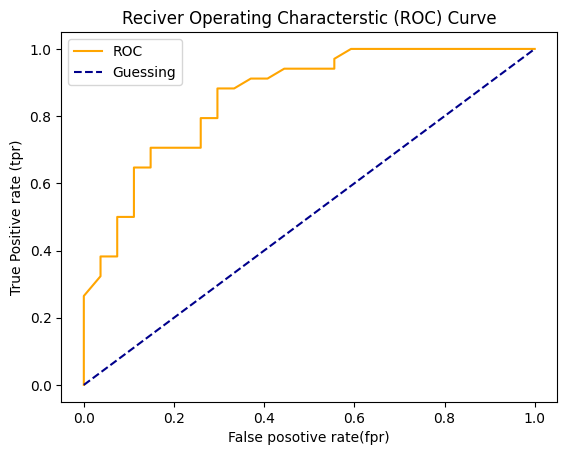

In [17]:
# Plotting ROC Curve

import matplotlib.pyplot as plt

def plot_roc_curve (fpr, tpr):
    """
    Plots a ROC Curve given the fpr and tpr of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    #Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False posotive rate(fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Reciver Operating Characterstic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve (fpr, tpr)

In [18]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_probs_positive))

0.8578431372549019


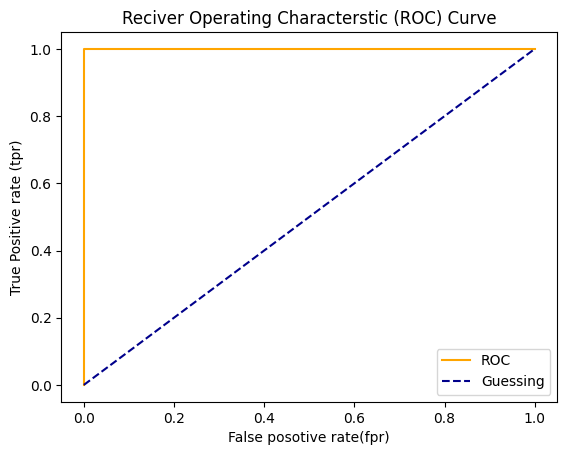

In [39]:
# Plot perfect ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [19]:
# Perfect AUC Score
print(roc_auc_score(y_test, y_test))

1.0


** Confusion Matrix **

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [19]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]])

In [10]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["predicted Labels"])

predicted Labels,0,1
Actual Label,,
0,24,5
1,3,29


In [11]:
24 + 5 + 3 + 29

61

In [12]:
len(x_test)

61

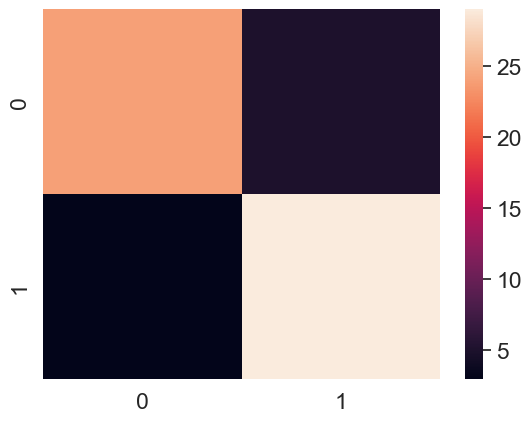

In [13]:
# Make our confusion matrix visual with Seaborn's heatmap()
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

In [30]:
sklearn.__version__

'1.5.2'

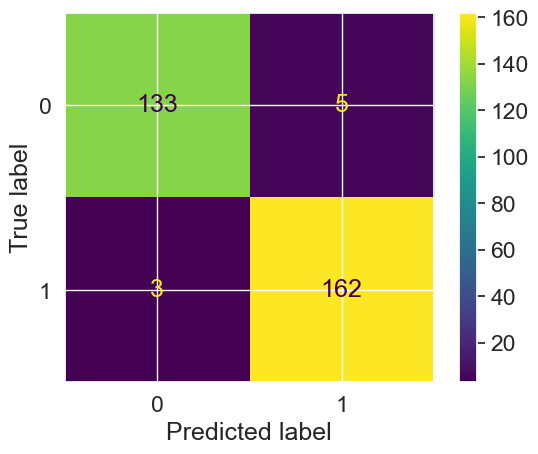

In [14]:
### Creating a confusion matrix using Scikit-Learn
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=x, y=y)

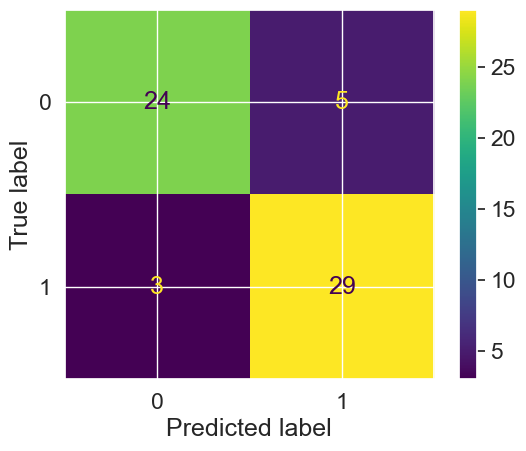

In [15]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

### Classification Report

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [27]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

C:\Users\Krishanu Anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Krishanu Anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Krishanu Anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression Model Evaluation Merics

 1. R^2 or coefficient of determination
 2. Mean Absolute Error (MAE)
 3. Mean Square Error (MSE)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=150)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8067246622225314

In [6]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [9]:
print(y_test.mean())

2.0550030959302323


In [10]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [11]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [12]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [13]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your modes predictions are

In [15]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
print(mae)

0.3265889786660209


In [18]:
df = pd.DataFrame(data={"actual values" : y_test,
                        "predicted values" : y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.487280,0.010280
3024,0.45800,0.724000,0.266000
15663,5.00001,4.951887,-0.048123
20484,2.18600,2.570447,0.384447
9814,2.78000,2.317280,-0.462720
13311,1.58700,1.646393,0.059393
7113,1.98200,2.289540,0.307540
7668,1.57500,1.657220,0.082220
18246,3.40000,2.491807,-0.908193
5723,4.46600,4.872108,0.406108


In [17]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [25]:
print(np.abs(df["differences"].mean()), " and " , df["differences"].mean())

0.011914181346898535  and  0.011914181346898535


**Mean square error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [70]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
print(mse)

0.25326973789613744


In [71]:
df["squared differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.487280,0.010280,0.000106
3024,0.45800,0.724000,0.266000,0.070756
15663,5.00001,4.951887,-0.048123,0.002316
20484,2.18600,2.570447,0.384447,0.147799
9814,2.78000,2.317280,-0.462720,0.214110


In [72]:
squared = np.square(df["differences"])
print(squared.mean())

0.25326973789613744


In [73]:
df_large = df.copy()
df_large.iloc[0, df.columns.get_loc("squared differences")] = 16

In [74]:
df_large

,actual values,predicted values,differences,squared differences
20046,0.47700,0.487280,0.010280,16.000000
3024,0.45800,0.724000,0.266000,0.070756
15663,5.00001,4.951887,-0.048123,0.002316
20484,2.18600,2.570447,0.384447,0.147799
9814,2.78000,2.317280,-0.462720,0.214110
...,...,...,...,...
15362,2.63300,2.206020,-0.426980,0.182312
16623,2.66800,1.967907,-0.700093,0.490131
18086,5.00001,4.845602,-0.154408,0.023842
2144,0.72300,0.706087,-0.016913,0.000286


In [77]:
print(df_large["squared differences"].mean())

0.257145681287998


In [78]:
df_large.iloc[:100, df.columns.get_loc("squared differences")] = 20

In [79]:
df_large

,actual values,predicted values,differences,squared differences
20046,0.47700,0.487280,0.010280,20.000000
3024,0.45800,0.724000,0.266000,20.000000
15663,5.00001,4.951887,-0.048123,20.000000
20484,2.18600,2.570447,0.384447,20.000000
9814,2.78000,2.317280,-0.462720,20.000000
...,...,...,...,...
15362,2.63300,2.206020,-0.426980,0.182312
16623,2.66800,1.967907,-0.700093,0.490131
18086,5.00001,4.845602,-0.154408,0.023842
2144,0.72300,0.706087,-0.016913,0.000286


In [81]:
print(df_large["squared differences"].mean())

0.7342297032749339


### 4.2.3 Finally using the `scoring` parameter

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [6]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [7]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [9]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [10]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [11]:
np.random.seed(42)
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [13]:
print(f"The cross-validated Precision is: {np.mean(cv_precision)}")

The cross-validated Precision is: 0.8329547346025924


In [14]:
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [15]:
print(f"The cross-validated Recall is: {np.mean(cv_recall)}")

The cross-validated Recall is: 0.8545454545454545


Lets see the `scoring` model being used for regression model

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [26]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

np.float64(0.6545458023124507)

In [29]:
np.random.seed(42)
cv_mse = cross_val_score(model, x, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

np.float64(-0.46141356443710196)

In [31]:
np.random.seed(42)
cv_mae = cross_val_score(model, x, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

np.float64(-0.4835773816036823)

### 4.3 Using Different evaluation metrics as Scikit-Learn functions

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier()

model.fit(x_train, y_train);

y_preds = model.predict(x_test)

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:2f}%")
print(f"F1: {f1_score(y_test, y_preds)*100:2f}%")

Classifier metrics on the test set
Accuracy: 85.245902%
Precision: 84.848485%
Recall: 87.500000%
F1: 86.153846%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=150)

model.fit(x_train, y_train)

model.score(x_test, y_test)

y_preds = model.predict(x_test)

print("Regression metrics on the test set")
print(f"R^2 Score: {r2_score(y_test, y_preds)*100:2f}%")
print(f"MAE: {mean_absolute_error(y_test, y_preds)*100:2f}%")
print(f"MSE: {mean_squared_error(y_test, y_preds)*100:2f}%")